In [ ]:
import pandas as pd
import numpy as np
import nltk
import os
import nltk.corpus
import glob


In [16]:
def get_globbed_files(directory, file_glob, recurse=True):
    """
    returns a list of files satisfying the file_glob expression
    in the context of dir
    temporarily changes directory and then resets to current dir
    recurses through the directory if recursive = True (default)    
    """
    current_dir = os.getcwd()
    os.chdir(directory)
    files = glob.glob(file_glob, recursive=recurse)
#    print("number of " + file_glob + " files: " + str(len(files)))
    os.chdir(current_dir)
    return files

In [27]:
project = '/Users/pm286/workspace/cmdev/ami3/src/test/resources/org/contentmine/ami/zika10'
# os.chdir(project)
file_glob = 'PMC*'
files = get_globbed_files(project, file_glob)
print("number of " + file_glob + " files: " + str(len(files)) + "\n " + str(files))
print("file type " + str(type(files)))

abstract_files = get_globbed_files(project, 'PMC*/sections/abstract/*.xml')
print("abstracts " + str(abstract_files))    

text_files = get_globbed_files(project, 'PMC*/sections/**/*.xml', recursive=False)
print("number of xml text files: " + str(len(text_files)) +"\n" + str(text_files))

figure_files = get_globbed_files(project, 'PMC*/sections/**/*figure*.xml', recursive=False)
# print("number of figure files: " + str(len(figure_files)) +"\n" + str(figure_files))

number of PMC* files: 8
 ['PMC320490', 'PMC3321795', 'PMC3113902', 'PMC3310457', 'PMC3310194', 'PMC3289602', 'PMC3321797', 'PMC3310660']
file type <class 'list'>
abstracts ['PMC320490/sections/abstract/background__4_0.xml', 'PMC3321795/sections/abstract/elem_0.xml', 'PMC3113902/sections/abstract/elem_0.xml', 'PMC3310457/sections/abstract/elem_1.xml', 'PMC3310457/sections/abstract/elem_0.xml', 'PMC3310194/sections/abstract/elem_0.xml', 'PMC3289602/sections/abstract/author_summary_1.xml', 'PMC3289602/sections/abstract/background__3_0.xml', 'PMC3321797/sections/abstract/elem_0.xml', 'PMC3310660/sections/abstract/elem_0.xml']
number of xml text files: 141
['PMC320490/sections/abstract/background__4_0.xml', 'PMC320490/sections/tables/table_1.xml', 'PMC320490/sections/tables/table_2.xml', 'PMC320490/sections/2_back/0_ack.xml', 'PMC320490/sections/3_floats-group/5_figure_4.xml', 'PMC320490/sections/3_floats-group/4_figure_3.xml', 'PMC320490/sections/3_floats-group/2_table_1.xml', 'PMC320490/s

In [30]:
text_contents = []
for text_file in text_files:
    text_filex = open(text_file,mode='r')
    text = text_filex.read()
    text_filex.close()
    text_contents.append(text)
    
len(text_contents) 
# text_contents

['<?xml version="1.0" encoding="UTF-8"?>\n<abstract>\n <sec>\n  <title>Background</title>\n  <p>Tardive dyskinesia (TD) is a major limitation of older antipsychotics. Newer antipsychotics have various other side effects such as weight gain, hyperglycemia, etc. In a previous study we have shown that an indolamine molecule expresses a moderate binding affinity at the dopamine D\n   <sub>2 </sub>and serotonin 5-HT\n   <sub>1A </sub>receptors in in vitro competition binding assays. In the present work, we tested its p-toluenesulfonyl derivative (TPBIA) for behavioral effects in rats, related to interactions with central dopamine receptors and its antioxidant activity.\n  </p>\n </sec>\n <sec sec-type="methods">\n  <title>Methods</title>\n  <p>Adult male Fischer-344 rats grouped as: i) Untreated rats: TPBIA was administered i.p. in various doses ii) Apomorphine-treated rats: were treated with apomorphine (1 mg kg\n   <sup>-1</sup>, i.p.) 10 min after the administration of TPBIA. Afterwards 

In [32]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')

minlen = 2

stop_en = set(stopwords.words('english'))
print("stop_en "+str(stop_en))

# filter words
content_words_list = []
for text_content in text_contents:
    # remove (most) XML markup
    text_content = re.sub('</?[^>]*>', '', text_content)
    words = word_tokenize(text_content)
    # remove stopwords, punctuation, and short words
    words = [w for w in words if w.lower() not in stop_en \
              and w not in string.punctuation\
              and len(w) >= minlen
             ]
        
    content_words_list.append(words)

content_words = [word for lizt in content_words_list for word in lizt]


stop_en {'doesn', 'was', 'into', 'haven', "she's", 'herself', 'nor', 'an', 'why', 'shan', 'from', 'when', 'at', 'about', 'some', 'now', 'won', 'how', 'don', 'aren', 'did', 'mightn', "couldn't", 'whom', 'once', 'doing', "you're", 'most', 'having', 'just', 'too', 'very', 'o', 're', 'what', 'because', 'these', 'should', 'wasn', 'll', 'we', 'such', "you'll", 'didn', 'its', 'any', 'of', 'in', 'only', "needn't", 'hasn', 'he', "haven't", 'that', 'his', 'during', 'wouldn', 'than', 'shouldn', 'y', 'hadn', 'myself', 'between', 'ma', 'to', "wouldn't", 'does', 'more', 'theirs', 'your', 'them', "mustn't", 'they', 'it', 'which', 'needn', 'same', 'him', 'am', 'both', 'yourselves', 'and', 'there', "wasn't", "shan't", 's', 'is', 'all', 'against', 'few', 'no', "you've", 'out', "should've", 'been', 'as', 'were', 'then', 'not', "hasn't", 'after', "weren't", 'our', 'had', 'mustn', 'with', 'hers', 'here', 'further', 'being', 'are', 'a', 'my', 'can', 'up', 'weren', 've', 'those', 'through', 'you', "it's", 'h

[nltk_data] Downloading package punkt to /Users/pm286/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/pm286/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('virus', 142), ('Spartina', 116), ('Ae', 78), ('figure', 52), ('Supplementary', 50), ('Figure', 49), ('ZIKV', 49), ('Zika', 48), ('University', 46), ('Museum', 46), ('permission', 45), ('British', 45), ('Columbia', 45), ('Herbarium', 45), ('published', 42), ('Image', 41), ('mm', 34), ('strains', 32), ('×townsendii', 30), ('anglica', 28), ('Table', 27), ('Uganda', 27), ('Beaty', 27), ('Biodiversity', 27), ('study', 26), ('Yap', 26), ('strain', 26), ('IgM', 26), ('sequence', 25), ('indicated', 24)]


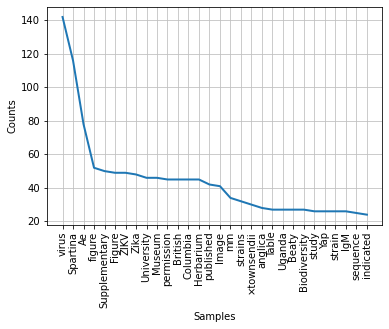

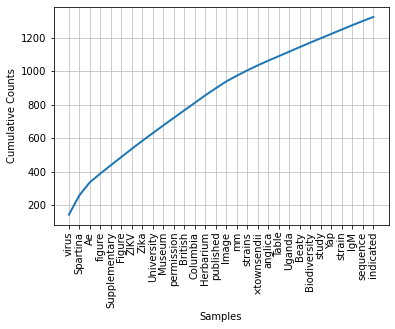

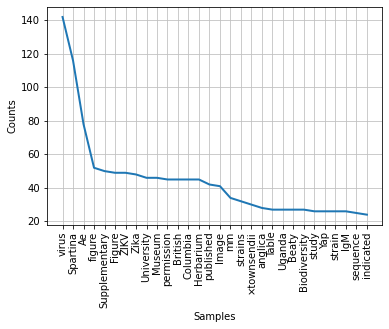

In [38]:
from nltk.probability import FreqDist
fdist = FreqDist(content_words)
# To find the frequency of top 10 words
print(fdist.most_common(30))

import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
fdist.plot(30,cumulative=True)
fdist.plot(30)
plt.show()


In [ ]:
# Stemming usually refers to normalizing words into its base form or root form.
# Importing Porterstemmer from nltk library
# Checking for the word ‘giving’ 
from nltk.stem import PorterStemmer
pst = PorterStemmer()

# Checking for the list of words
stm = ["waited", "waiting", "waits"]
for word in stm :
   print(word+ ":" +pst.stem(word))


In [ ]:
# Importing LancasterStemmer from nltk
from nltk.stem import LancasterStemmer
lst = LancasterStemmer()
stm1 = ["giving", "given", "given", "gave"]
for word in stm1 :
 print(word+ ":" +lst.stem(word))
 

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer() 

 
print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora"))


In [ ]:
from nltk import ne_chunk
nltk.download('maxent_ne_chunker')
nltk.download('words')
# tokenize and POS Tagging before doing chunk
tokens = word_tokenize(text1)
tags = nltk.pos_tag(tokens)
chunk = ne_chunk(tags)
chunk

In [ ]:
tokens = word_tokenize(text1)
tokens
tags = nltk.pos_tag(tokens)
reg = "NP: {<DT>?<JJ>*<NN>}" 
parser = nltk.RegexpParser(reg)
result = parser.parse(tags)
print(result)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
cv


In [ ]:
from nltk.tokenize import sent_tokenize
sentences=sent_tokenize(text)
print("sentences: "+str(len(sentences)))
for sentence in sentences:
    print(">> "+sentence+"\n..")
    phrases = sentence.split("\n")
    print("??"+str(len(phrases)))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
# text_tf= tf.fit_transform(data['Phrase'])
text_tf= tf.fit_transform(phrases)

In [ ]:
text_tf.shape


In [ ]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer() 
word_count_vector=cv.fit_transform(sentences)
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

In [ ]:
# ==================
# from scikit-learn
# https://scikit-learn.org/stable/auto_examples/bicluster/plot_bicluster_newsgroups.html#sphx-glr-auto-examples-bicluster-plot-bicluster-newsgroups-py
# ==================

In [ ]:
from collections import defaultdict
import operator
from time import time

import numpy as np

from sklearn.cluster import SpectralCoclustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.cluster import v_measure_score

print(__doc__)


def number_normalizer(tokens):
    """ Map all numeric tokens to a placeholder.

    For many applications, tokens that begin with a number are not directly
    useful, but the fact that such a token exists can be relevant.  By applying
    this form of dimensionality reduction, some methods may perform better.
    """
    return ("#NUMBER" if token[0].isdigit() else token for token in tokens)


class NumberNormalizingVectorizer(TfidfVectorizer):
    def build_tokenizer(self):
        tokenize = super().build_tokenizer()
        return lambda doc: list(number_normalizer(tokenize(doc)))


# exclude 'comp.os.ms-windows.misc'
categories = ['alt.atheism', 'comp.graphics',
              'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'comp.windows.x', 'misc.forsale', 'rec.autos',
              'rec.motorcycles', 'rec.sport.baseball',
              'rec.sport.hockey', 'sci.crypt', 'sci.electronics',
              'sci.med', 'sci.space', 'soc.religion.christian',
              'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']
newsgroups = fetch_20newsgroups(categories=categories)
print(">> "+str(len(newsgroups))+"/"+str(type(newsgroups))+"/"+str(dir(newsgroups)))
# 5/<class 'sklearn.utils.Bunch'>/['DESCR', 'data', 'filenames', 'target', 'target_names']
print("=====")
print(">ng> " \
      +str(newsgroups.data[0]) \
      +"/"+str(len(newsgroups.data[0])) \
      +"/filenames: "+str(len(newsgroups.filenames)) \
      +"/"+newsgroups.filenames[0] \
      +"/"+str(len(newsgroups.target)) \
      +"/"+str(newsgroups.target[0]) \
      +"/"+str(newsgroups.target_names[0]) \
     )

y_true = newsgroups.target

vectorizer = NumberNormalizingVectorizer(stop_words='english', min_df=2)
cocluster = SpectralCoclustering(n_clusters=len(categories),
                                 svd_method='arpack', random_state=0)
kmeans = MiniBatchKMeans(n_clusters=len(categories), batch_size=20000,
                         random_state=0)

print("Vectorizing...")
print("xx "+vectorizer.fit_transform.__doc__)
raw_data = newsgroups.data
raw_data = sentences
print("len: "+str(len(raw_data))+"/"+str(raw_data))

X = vectorizer.fit_transform(raw_data)
# print("X "+X.shape)

print("Coclustering...")
start_time = time()
cocluster.fit(X)
y_cocluster = cocluster.row_labels_
print("Done in {:.2f}s. V-measure: {:.4f}".format(
    time() - start_time,
    v_measure_score(y_cocluster, y_true)))

print("MiniBatchKMeans...")
start_time = time()
y_kmeans = kmeans.fit_predict(X)
print("Done in {:.2f}s. V-measure: {:.4f}".format(
    time() - start_time,
    v_measure_score(y_kmeans, y_true)))

feature_names = vectorizer.get_feature_names()
document_names = list(newsgroups.target_names[i] for i in newsgroups.target)


def bicluster_ncut(i):
    rows, cols = cocluster.get_indices(i)
    if not (np.any(rows) and np.any(cols)):
        import sys
        return sys.float_info.max
    row_complement = np.nonzero(np.logical_not(cocluster.rows_[i]))[0]
    col_complement = np.nonzero(np.logical_not(cocluster.columns_[i]))[0]
    # Note: the following is identical to X[rows[:, np.newaxis],
    # cols].sum() but much faster in scipy <= 0.16
    weight = X[rows][:, cols].sum()
    cut = (X[row_complement][:, cols].sum() +
           X[rows][:, col_complement].sum())
    return cut / weight


def most_common(d):
    """Items of a defaultdict(int) with the highest values.

    Like Counter.most_common in Python >=2.7.
    """
    return sorted(d.items(), key=operator.itemgetter(1), reverse=True)


bicluster_ncuts = list(bicluster_ncut(i)
                       for i in range(len(newsgroups.target_names)))
best_idx = np.argsort(bicluster_ncuts)[:5]

print()
print("Best biclusters:")
print("----------------")
for idx, cluster in enumerate(best_idx):
    n_rows, n_cols = cocluster.get_shape(cluster)
    cluster_docs, cluster_words = cocluster.get_indices(cluster)
    if not len(cluster_docs) or not len(cluster_words):
        continue

    # categories
    counter = defaultdict(int)
    for i in cluster_docs:
        counter[document_names[i]] += 1
    cat_string = ", ".join("{:.0f}% {}".format(float(c) / n_rows * 100, name)
                           for name, c in most_common(counter)[:3])

    # words
    out_of_cluster_docs = cocluster.row_labels_ != cluster
    out_of_cluster_docs = np.where(out_of_cluster_docs)[0]
    word_col = X[:, cluster_words]
    word_scores = np.array(word_col[cluster_docs, :].sum(axis=0) -
                           word_col[out_of_cluster_docs, :].sum(axis=0))
    word_scores = word_scores.ravel()
    important_words = list(feature_names[cluster_words[i]]
                           for i in word_scores.argsort()[:-11:-1])

    print("bicluster {} : {} documents, {} words".format(
        idx, n_rows, n_cols))
    print("categories   : {}".format(cat_string))
    print("words        : {}\n".format(', '.join(important_words)))